## Analysis of VirProBERT Embeddings - UniRef90
### Dataset: UniRef90

**Models**: VirProBERT

**Maximum Sequence Length**: segment len 256, stride 64

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/miniconda3/envs/zoonosis/lib/python311.zip',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/lib-dynload',
 '',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/interpretability/embedding/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/interpretability/embedding/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/interpretability/embedding/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/interpretability/embedding/../..']

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
virprobert_embedding_file_path = os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20241128/host_multi/mlp_embedding/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_vs30_hybd_attn_msl256s64ae_bn_cls_fnn_2l_d1024_lr1e-4_output.csv")

In [4]:
virprobert_embedding_df = pd.read_csv(virprobert_embedding_file_path, index_col=0)
virprobert_embedding_df

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,uniref90_id,y_true
0,0.068354,2.205018,-0.678101,2.247405,1.951884,0.110095,-0.534742,0.775231,-0.663522,0.725739,...,0.411300,-0.648949,-0.535414,0.189560,-0.560774,-0.551165,-0.687058,-0.601948,['UniRef90_J7G5A9'],Homo sapiens
1,-0.683813,-0.236950,-0.678101,0.259859,1.204184,0.080420,1.064969,1.636711,-0.581961,-0.640536,...,0.361470,1.028062,-0.535414,1.855301,2.072860,-0.551165,0.859209,-0.601948,['UniRef90_C9EE46'],Homo sapiens
2,-0.683813,-0.701238,-0.678101,-0.479198,-0.384463,-0.462627,0.356139,-0.554080,2.387325,-0.640536,...,-0.689319,-0.648949,0.727735,-0.592465,-0.560774,3.107793,-0.687058,0.478285,['UniRef90_D1G1Z7'],Homo sapiens
3,-0.683813,-0.701238,2.234598,-0.479198,-0.384463,-0.462627,2.209557,-0.554080,0.455875,-0.640536,...,1.427691,-0.648949,-0.535414,-0.706256,2.383947,0.389285,-0.687058,-0.601948,['UniRef90_A0AA50QAF6'],Homo sapiens
4,-0.542059,-0.655524,-0.230373,0.505842,0.208040,-0.462627,-0.534742,0.462758,0.622987,0.757299,...,-0.689319,-0.253081,-0.535414,0.826477,-0.560774,-0.551165,-0.687058,-0.272992,['UniRef90_F6L8W1'],Homo sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31681,-0.683813,-0.701238,-0.678101,-0.479198,-0.240940,1.023440,0.447651,-0.554080,0.878391,-0.640536,...,3.580016,-0.648949,-0.535414,-0.706256,2.298572,0.499549,-0.687058,-0.601948,['UniRef90_A0A173ADU0'],Gallus gallus
31682,0.413525,0.638839,-0.678101,-0.479198,-0.384463,0.386791,-0.534742,-0.554080,-0.270428,0.705440,...,-0.689319,-0.648949,1.453515,-0.706256,-0.560774,-0.423217,-0.687058,1.795408,['UniRef90_U5Y7B5'],Homo sapiens
31683,1.184260,-0.701238,-0.294568,-0.479198,-0.384463,-0.462627,0.609796,-0.232145,-0.663522,-0.640536,...,-0.689319,0.036823,1.493267,-0.706256,-0.560774,-0.551165,-0.385179,0.420079,['UniRef90_C1JS03'],Homo sapiens
31684,1.655126,-0.701238,-0.287811,-0.479198,-0.384463,-0.462627,1.042899,-0.554080,-0.663522,-0.640536,...,-0.689319,1.213686,2.142573,-0.375290,-0.560774,-0.551165,0.161230,1.729126,['UniRef90_C1JWR2'],Homo sapiens


In [5]:
label_col = "y_true"
virprobert_embedding_df[label_col].unique()

array(['Homo sapiens', 'Gallus gallus', 'Hydrochoerus hydrochaeris',
       'Sus scrofa', 'Marmota himalayana'], dtype=object)

In [6]:
columns = list(virprobert_embedding_df.columns)
columns.remove("uniref90_id")
columns.remove(label_col)

In [7]:
len(columns)

1024

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
virprobert_embedding_scaled_df = StandardScaler().fit_transform(virprobert_embedding_df[columns])

In [10]:
virprobert_embedding_scaled_df.shape

(31686, 1024)

In [11]:
import umap

/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
umap_emb = umap.UMAP().fit_transform(virprobert_embedding_df[columns])

In [13]:
umap_emb

array([[-1.8324792,  2.0385423],
       [18.489378 ,  8.390962 ],
       [ 9.515599 ,  5.1492558],
       ...,
       [15.4239855,  3.1290724],
       [15.840227 ,  3.085591 ],
       [10.634792 ,  8.290033 ]], dtype=float32)

In [14]:
umap_emb_df = pd.DataFrame(umap_emb, columns=["umap1", "umap2"])
umap_emb_df[label_col] = virprobert_embedding_df[label_col]
umap_emb_df

,umap1,umap2,y_true
0,-1.832479,2.038542,Homo sapiens
1,18.489378,8.390962,Homo sapiens
2,9.515599,5.149256,Homo sapiens
3,7.288156,3.795125,Homo sapiens
4,16.582502,12.216877,Homo sapiens
...,...,...,...
31681,7.066863,5.147997,Gallus gallus
31682,11.967018,3.421656,Homo sapiens
31683,15.423985,3.129072,Homo sapiens
31684,15.840227,3.085591,Homo sapiens


<Figure size 640x480 with 0 Axes>

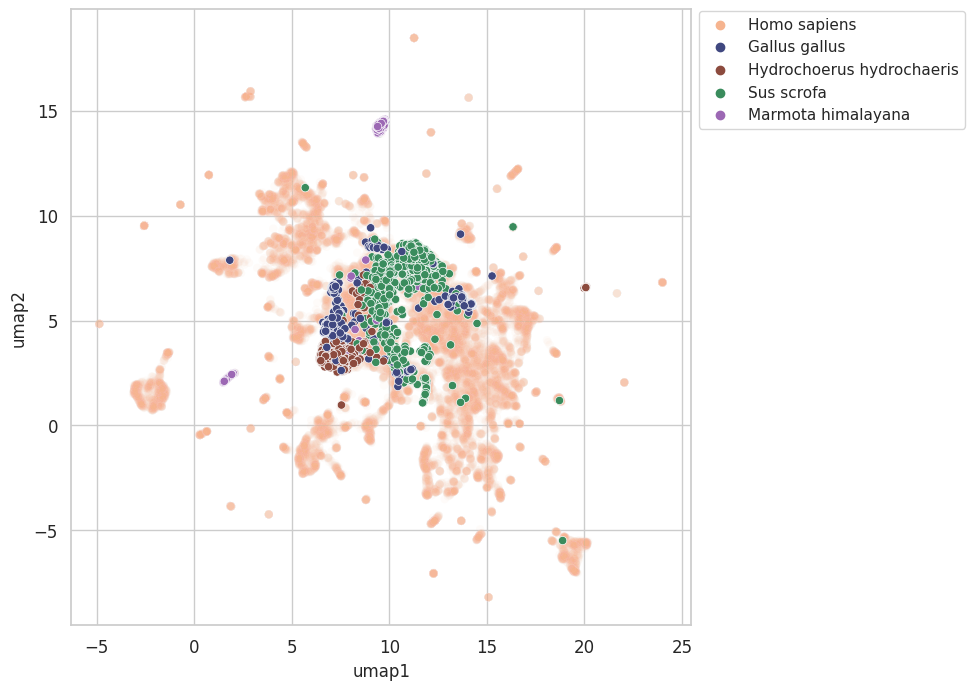

In [61]:
plt.clf()
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.set_theme(style="whitegrid")
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams.update({'font.size': 12})

color_palette = sns.cubehelix_palette(start=1, rot=5.5, hue=1, gamma=1, dark=0.3, light=0.5, reverse=True, n_colors=(umap_emb_df[label_col].nunique() - 1))

sns.scatterplot(data=umap_emb_df[umap_emb_df[label_col] == "Homo sapiens"], x="umap1", y="umap2", hue=label_col, ax=ax, alpha=.05, palette=[sns.color_palette("rocket_r")[0]])
sns.scatterplot(data=umap_emb_df[umap_emb_df[label_col] != "Homo sapiens"], x="umap1", y="umap2", hue=label_col, ax=ax, palette=color_palette)
ax.legend(bbox_to_anchor=(1.00, 1.01))


In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne_emb = TSNE(init="pca", perplexity=50, ).fit_transform(virprobert_embedding_df[columns])

In [18]:
tsne_emb_df = pd.DataFrame(tsne_emb, columns=["tsne1", "tsne2"])
tsne_emb_df[label_col] = virprobert_embedding_df[label_col]
tsne_emb_df

,tsne1,tsne2,y_true
0,-82.988052,33.301064,Homo sapiens
1,-15.715006,90.680145,Homo sapiens
2,-9.756841,-17.294659,Homo sapiens
3,-62.156822,-51.957222,Homo sapiens
4,10.095551,90.879280,Homo sapiens
...,...,...,...
31681,-62.205761,-34.851814,Gallus gallus
31682,17.183668,-11.897937,Homo sapiens
31683,50.662525,18.590088,Homo sapiens
31684,51.549438,26.685566,Homo sapiens


<Figure size 640x480 with 0 Axes>

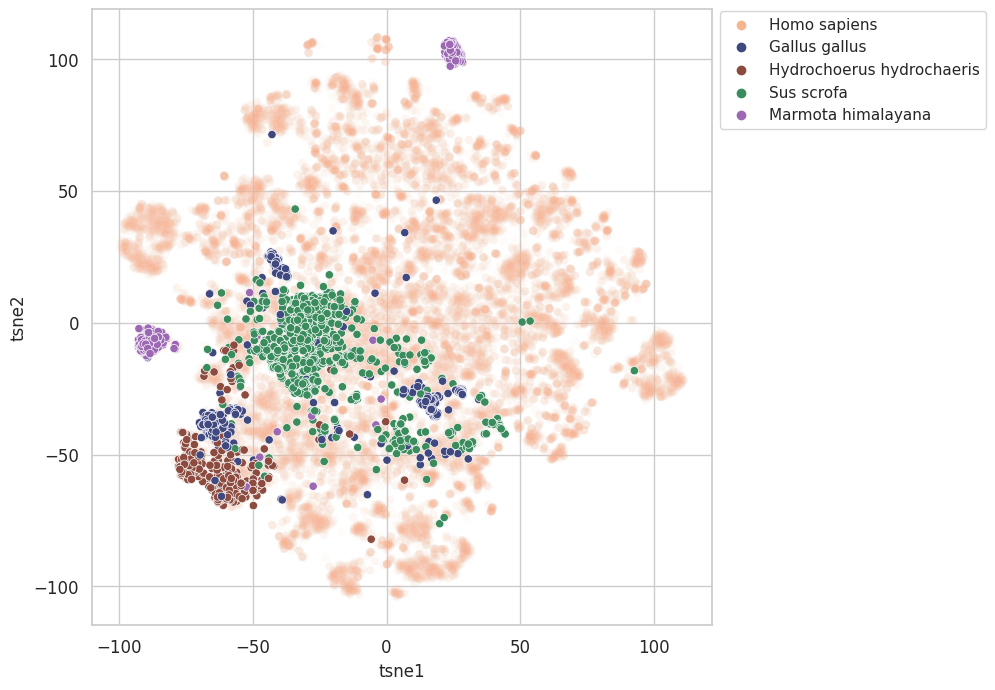

In [60]:
plt.clf()
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams.update({'font.size': 12})

color_palette = sns.cubehelix_palette(start=1, rot=5.5, hue=1, gamma=1, dark=0.3, light=0.5, reverse=True, n_colors=(tsne_emb_df[label_col].nunique() - 1))


sns.scatterplot(data=tsne_emb_df[tsne_emb_df[label_col] == "Homo sapiens"], x="tsne1", y="tsne2", hue=label_col, ax=ax, alpha=.05, palette=[sns.color_palette("rocket_r")[0]])
sns.scatterplot(data=tsne_emb_df[tsne_emb_df[label_col] != "Homo sapiens"], x="tsne1", y="tsne2", hue=label_col, ax=ax, palette=color_palette)
ax.legend(bbox_to_anchor=(1.00, 1.01))
